#    Kuromasu-黒マス

Kajetan Jankowski

#  01. Wstęp

Kuromasu jest to japońska łamigówka logiczna, powstała w 2005 roku. Kuromasu rozgrywana jest na prostokątnej siatce. Niektóre z komórek zawierają liczby. Każda komórka może być czarna lub biała. Celem jest określenie typu każdej komórki.


Zasady:

-Każda liczba na planszy reprezentuje liczbę białych komórek, które można zobaczyć z tej komórki. Komórkę można zobaczyć z innej komórki, jeśli obie komórki znajdują się w tym samym wierszu lub kolumnie i nie ma między nimi czarnych komórek w tym wierszu lub kolumnie.

-Ponumerowane komórki nie mogą być czarne.

-Żadne dwie czarne komórki nie mogą przylegać poziomo ani pionowo.

-Wszystkie białe komórki muszą być połączone poziomo lub pionowo

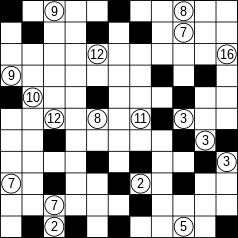

#  02. Algorytm


Pierwszym algorytmem jest algorytm genetyczny

### Parametry

Chromosom jest kodowany jako ciag liczb, dwie liczby obok siebie to wspołrzedne czarnych punktów
np: (4,4) (0,2) (3,0) (0,4) (4,2) (1, 3) (3,1) (1,4)



W pliku plansze.py znajdują sie tablice z planszami tutaj akurat 3 plansze 5x5 

0-oznacza białe pole
-1 - oznacza czarne pole 
reszta liczb oznacza ilość sąsiednich białych pól


### Fitness_func

Funkcja fitness nakłada na plansze czarne punkty(-1) czyli wspołrzedne z chromosomu, nastepnie literując po plansze gdy napotka pole z liczbą zlicza i zapisuje do zmiennej "count" ile pól jest w pionie i w poziomie dopóki nie napotka czarnego pola (-1).Jeśli count = danej liczbie to możemy dodać do zmiennej "score" że jedna liczba pól jest poprawnie zablokowana.

Jedną z zasad jest taka aby pola czarne nie sąsiadowaly ze soba w pionie i w poziomie dlatego podczas literacji po planszy, gdy napotkamy czarne pole sprawdane są sąsiednie pola. Jeśli się okaże, że pola czarne sąsiadują ze sobą naliczana jest surowa kara 100 pkt. 

Jako wynik funkcji fitness zwrac procent poprawnych pól z liczba odejmóc od niego kare. 

In [18]:
import numpy as np
import copy



def fitness_func(solution):
    helper = copy.deepcopy(plansza)
    kara = 0
    kara2 = 0

    for coord in range(0,len(solution),2) :
        # print(solution[coord],solution[coord+1])
        if helper[solution[coord]][solution[coord+1]] == 0:
            helper[solution[coord]][solution[coord+1]] = -1
        elif helper[solution[coord]][solution[coord+1]] == -1:
            kara=100
        else:
            kara2+=100
    

    score = 0 #ile liczb sie zgadza 
    liczb = 0 #ile pól z liczbami 
    for row in range(len(helper)):
        for col in range(len(helper[row])):
            # print(helper[row][col] )
            if helper[row][col] == 0:  # puste pole
                continue
            elif helper[row][col] > 0:  # pole z liczbą
                count = 0
                liczb += 1
                # licz białe pola poziomo w prawo od pola z liczbą
                for i in range(col+1, len(helper[row])):
                    if helper[row][i] == -1:  # czarne pole
                           break
                    else:  # białe pole z liczbą
                        count += 1
                # licz białe pola poziomo w lewo od pola z liczbą
                for i in range(col-1, -1, -1):
                    if helper[row][i] == -1:  # czarne pole
                        break
                    else : # puste pole
                        count += 1
                # licz białe pola pionowo w dół od pola z liczbą
                for i in range(row+1, len(helper)):
                    if helper[i][col] == -1:  # czarne pole
                         break
                    else:  # białe pole z liczbą
                        count += 1
                        
                # licz białe pola pionowo w górę od pola z liczbą
                for i in range(row-1, -1, -1):
                    if helper[i][col] == -1:  # czarne pole
                        break
                    else:  # białe pole z liczbą
                        count += 1
                if count == helper[row][col]:
                    score += 1
            else:
                for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
                    x = row + dx
                    y = col + dy
                    if x >=0 and y >= 0 and x<len(helper) and y<len(helper) :
                        if helper[x][y] == -1:
                            kara=100
                            break
    
    fitness=(score/liczb * 100) - kara 
    print(*helper, sep="\n")

   
    return fitness



In [19]:
plansza=[[2, 0, 0, 0, 0],
             [0, 4, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 6, 0],
             [0, 0, 0, 0, 1]]
print(fitness_func([4,4,4,4,3,0,3,4,1,2,4,2,0,0,0,1]))

[2, -1, 0, 0, 0]
[0, 4, -1, 0, 0]
[0, 0, 0, 0, 0]
[-1, 0, 0, 6, -1]
[0, 0, -1, 0, 1]
100.0


Odpajacać funckje fitness widzimy rozwiazaną tablice oraz wynik = 100.0

### Ilustracja różne inputy

fitness_function = fitness_func
num_genes = liczba*2
num_parents_mating = 100
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 4


Dla planszy 5x5 :

sol_per_pop =150 

num_generations =50  
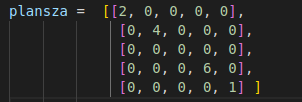





Dla Planszy 10x10:


sol_per_pop =350  

num_generations =175 




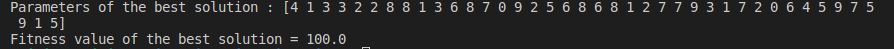

Dla planszy 15x15 



sol_per_pop =400  

num_generations =250



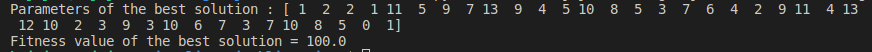

### Analiza

Mój algorytm genetyczny dobrze sobie radzi z małymi i średnimi inputami, problem pojawia sie z dużymi.Poniżej jest zestawienie przeprowadzonej analizy odnośnie inputów.Odpaliłem 100 razy algorytm dla małych, średnich  oraz dla dużych inputów. Przedstawione jest ilość poprawnie rozwiązanych plansze i ich średni czas.

|input| liczba populacji | skuteczność  |czas (s)|
|:-:|:-:|:-:| :-:|
|5x5| 150 | 85/100  |  0.39259452290005153  |
|10x10| 350  |  64/100 |6.83842833712697 |
|15x15| 450  |   3/100 | 22.171364386876423 |

Algorytm rozwiązuje problem, najlepiej sobie radzi z małymi inputami, skuteczność maleje z wielkością inputów. 


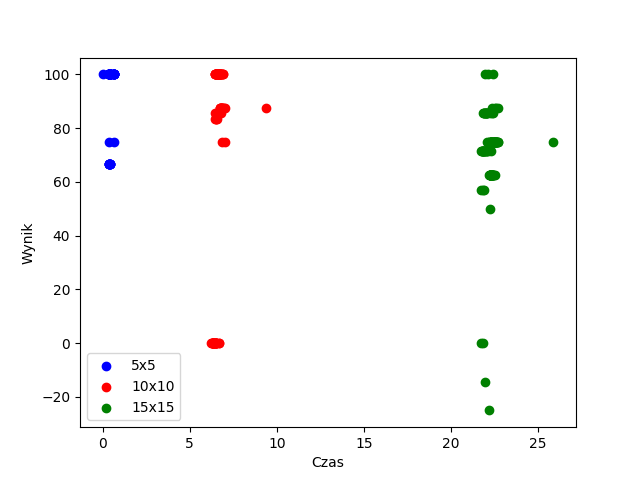

Zrobiłem jeszcze jeden eksperyment i dodałem populacji oto wyniki : 

|input| liczba populacji | skuteczność  |czas (s)|
|:-:|:-:|:-:| :-:|
|5x5| 300 | 100/100  |  0.7717806506156921  |
|10x10| 700  |  76/100 |13.799968597136045 |
|15x15| 1000  |   18/100 | 49.528447058465744 |








Tak jak zakładaliśmy po zwieszeniu populacji zwieszka się skuteczność algorytmu, ale kosztem czasu wykonywania 


# 03. Drugi Algorytm

Drugi Algorytmem jest PSO czyli Particle Swarm Optimizer (Rój cząstek)

### Funkcja optymalizacji

Funkcja optymalizacji jest bardzo podobna do wcześniejszej funkcji Fitness. Dziła podobnie, zmienna solution jest to ciag 0 i 1 które określają czy na danym pole jest czarna kropka czy nie. Nastepnie funkcja literuje po planszy sprawdzając czy sie wszystko zgadza i nagradza według zasad gry 

In [41]:
import pyswarms as ps
def optimize_func(solution,board):
            helper = copy.deepcopy(board)
            kara = 0
            kara2 = 0
            solution2 = solution.reshape((len(helper),len(helper)))
            for i in range(0,len(solution)):
                if solution[i]==1:
                    if helper[i//len(solution2)][i % len(solution2)] == 0:
                        helper[i//len(solution2)][i % len(solution2)] = -1
                    elif helper[i//len(solution2)][i % len(solution2)] == -1:
                        kara=100
                    else:
                        kara2+=10

            score = 0 #ile liczb sie zgadza 
            liczb = 0 #ile pól z liczbami 
            black = [] #czarne potrzebne 
            for row in range(len(helper)):
                for col in range(len(helper[row])):
                    # print(helper[row][col] )
                    if helper[row][col] == 0:  # puste pole
                        continue
                    elif helper[row][col] > 0:  # pole z liczbą
                        count = 0
                        liczb += 1
                        # licz białe pola poziomo w prawo od pola z liczbą
                        for i in range(col+1, len(helper[row])):
                            if helper[row][i] == -1:  # czarne pole
                                if [row,i] not in black:
                                    black.append([row,i])
                                break
                            else:  # białe pole z liczbą
                                count += 1
                        # licz białe pola poziomo w lewo od pola z liczbą
                        for i in range(col-1, -1, -1):
                            if helper[row][i] == -1:  # czarne pole
                                if [row,i] not in black:
                                    black.append([row,i])
                                break
                            else : # puste pole
                                count += 1
                        # licz białe pola pionowo w dół od pola z liczbą
                        for i in range(row+1, len(helper)):
                            if helper[i][col] == -1:  # czarne pole
                                if [row,i] not in black:
                                    black.append([row,i])
                                break
                            else:  # białe pole z liczbą
                                count += 1
                                
                        # licz białe pola pionowo w górę od pola z liczbą
                        for i in range(row-1, -1, -1):
                            if helper[i][col] == -1:  # czarne pole
                                if [row,i] not in black:
                                    black.append([row,i])
                                break
                            else:  # białe pole z liczbą
                                count += 1
                        if count == helper[row][col]:
                            score += 1
                    else:
                        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
                            x = row + dx
                            y = col + dy
                            if x >=0 and y >= 0 and x<len(helper) and y<len(helper) :
                                if helper[x][y] == -1:
                                    kara=100
                                    break

            fitness=(score/liczb * 100) - kara -kara2

            return fitness*-1


def fitness_function(positions, board):

    positions = np.array(positions)

    fitness = np.zeros(len(positions))

    for i, solution in enumerate(positions):

        fitness[i]=optimize_func(solution,board)

    return fitness


def pso_solve(kuromasu_board, num_particles, max_iter):

    # Inicjalizacja rozmiarów planszy i obliczenie liczby komórek planszy
    num_cells = len(kuromasu_board)*len(kuromasu_board)
    # Inicjalizacja położeń cząstek oraz ich prędkości
    options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, "k":2, "p":2}
    optimizer = ps.discrete.binary.BinaryPSO(n_particles=num_particles, dimensions=num_cells, options=options)
    best_pos, best_cost = optimizer.optimize(fitness_function, iters=max_iter, board=kuromasu_board)

    return best_cost, best_pos





Korzystam z tych samych tablic co w poprzednik algorytmie

In [45]:
plansze = [[2, 0, 0, 0, 0],
                  [0, 4, 0, 0, 0],
                  [0, 0, 0, 0, 0],
                  [0, 0, 0, 6, 0],
                  [0, 0, 0, 0, 0]]
                  
print(pso_solve(plansze, 20, 1000))

### Analiza

Drugi algorytm podałem podobnemu eksperymentowi co pierwczy, odpaliłem 30 razy algorytm z małymi , średnimi i dużymi inputami.Dla  Poniżej wyniki

|input| liczba cząstek|liczba literacji | skuteczność  |czas (s)|
|:-:|:-:|:-:| :-:| :-:|
|5x5|20| 1000 | 12/100  |  1.1862061222394307  |
|10x10|50 | 5000  |  0/100 |29.59471559524536|
|15x15| 100|10000  |   0/100 |242.05914759635925 |

Jak widzimy wyniki są nie zadawalające dla dużych  oraz średnich inputów dla małych mogą być

# 04. Podsumowanie

Algorytm genetyczny rozwiazał problem i jego czasy nie były złe, w porównaniu do drugiego algorytmu PSO , można powiedzieć, że wypadł bardzo dobrze. 

Natomiast Algorytm PSO nie dał satysfakcjonującego wyniku. Dla mały inputów jeszcze było dobrze natomiast dla reszty już nie. Długi czas wykonywania i mała skuteczność ,takie cechy nie są wskazana 

### bibliografia:

https://en.wikipedia.org/wiki/Kuromasu